# Kondo Model URG
$$
H = \sum_{k\sigma}\left(\epsilon_k - \mu\right)\hat \tau_{k\sigma} + J\sum_{kk^\prime}\vec{S_d}\cdot\vec{s_{kk^\prime}}
$$
$$
\Delta J(D) =  -J^2 n(D) \frac{1}{\omega - \frac{1}{2}\left(D - \mu\right) + \frac{1}{4}J}
$$


In [1]:
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from multiprocessing import Pool
from IPython.display import Markdown as md
import itertools

font = {'size'   : 17}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 7, 5
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

In [26]:
def define_shells(D):
    N = 10*D     # total number of particles
    m = N     # number of energy slices
    nj = N/m    # doesnt depend on value of N because I have set m:=N
    return np.linspace(D, 0, m), nj

In [27]:
def rg(w, E, J, nj):
    mu = 0
    nj = 1
    delta = -nj*J**2 /(w - E/2 + J/4)
    if J * (J + delta) <= 0:
        return 0
    else:
        return J+delta


In [37]:
def complete_rg(w, J, E_range, nj):
    mu = 0
    x, y,z = [], [], []
    den = w - E_range[0]/2 + J/4
    c = len(E_range)
    for E in E_range:
        if den * (w - E/2 + J/4) <= 0 or J == 0:
            #y.append(-(w - (Ek_range[-1]-mu)/2)*4)
            return x, y, z
        x.append(E)
        y.append(J)
        z.append(c)
        c -= 1
        den = w - E/2 + J/4
        J = rg(w, E, J, nj)
    return x, y, z

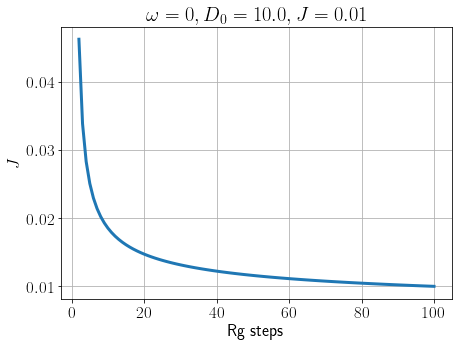

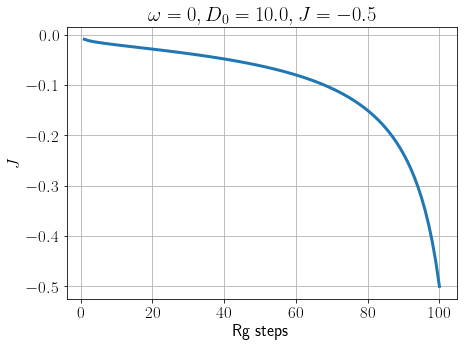

In [40]:
D = 10
E_range, nj = define_shells(D)
J = 0.01
w = 0
x, y, z = complete_rg(w, J, E_range, nj)
plt.plot(z, y)
plt.xlabel(r"Rg steps")
plt.ylabel(r"$J$")
plt.title(r'$\omega={}, D_0={}, J={}$'.format(w,E_range[0],J))
plt.show()
J = -0.5
w = 0
x, y, z = complete_rg(w, J, E_range, nj)
plt.plot(z, y)
plt.title(r'$\omega={}, D_0={}, J={}$'.format(w,E_range[0],J))
plt.xlabel(r"Rg steps")
plt.ylabel(r"$J$")
plt.show()

1
10
100
1000
10000


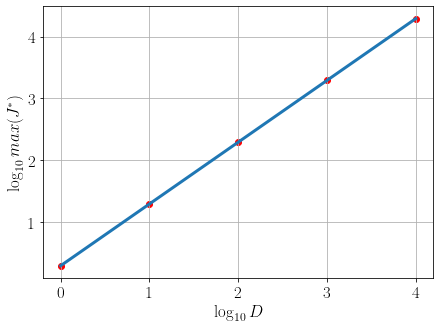

In [42]:
def JvsD():
    Jmax = []
    D_range = 10**np.arange(0,5)
    for D in D_range:
        print (D)
        J_range = np.arange(0.1,100000,0.1)
        w = D/100
        J_star = []
        Jmax_curr = J_range[0]
        for J in J_range:
            if w - D/2 + J/4 > 0:
                continue
            E_range, nj = define_shells(D)
            x, y, z = complete_rg(w, J, E_range, nj)
            if x == []:
                continue
            Jfp = 2*x[-1] - 4*w
            if x != [] and Jmax_curr < Jfp:
                Jmax_curr = Jfp
        Jmax.append(Jmax_curr)

    plt.plot(np.log10(D_range), np.log10(Jmax))
    plt.scatter(np.log10(D_range), np.log10(Jmax), marker="o", color="r")
    plt.xlabel(r"$\log_{10}D$")
    plt.ylabel(r"$\log_{10}{max}(J^*)$")
    plt.show()
JvsD()

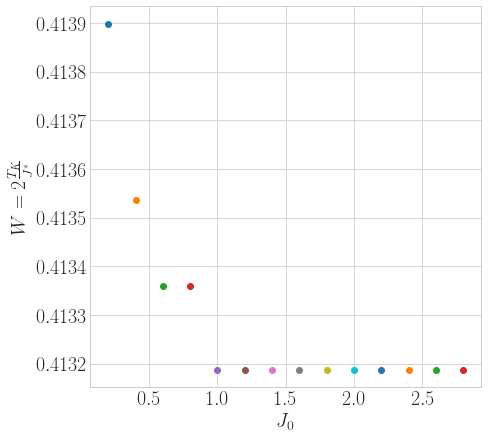

In [78]:
def wilson_num(w,D):
    E_range, nj = define_shells(D)
    for J0 in np.arange(0.2,3,0.2):
        x, y = complete_rg(w, J0, E_range, nj)
        Dstar = x[-1]
        D0 = x[0]
        Jstar = 2*Dstar - 4*w
        Tk = Dstar**2/(D0*Jstar)
        W = 2*Tk/Jstar
        plt.scatter(J0, W)

D = 1.26
w = D/100
wilson_num(w, D)
plt.xlabel(r"$J_0$")
plt.ylabel(r"$W = 2\frac{T_K}{J^*}$")
plt.show()